In [37]:
# Empezaremos a importar librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import os
os.chdir("/Users/randy/OneDrive/Escritorio")

In [38]:
# Cargamos el archivo en un DATAFRAME
df = pd.read_excel("Mexico GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [39]:
# VIsualizamos un poco el conteniudo de las varibles para saber si son variables CUANTITATIVAS O CUALITATIVAS
df.describe()

,Periodo,GDP
count,62.000000,6.200000e+01
mean,1990.500000,4.866155e+11
std,18.041619,4.544804e+11
min,1960.000000,1.304000e+10
25%,1975.250000,8.336062e+10
50%,1990.500000,2.885511e+11
75%,2005.750000,8.944031e+11
max,2021.000000,1.315351e+12


<function matplotlib.pyplot.show(close=None, block=None)>

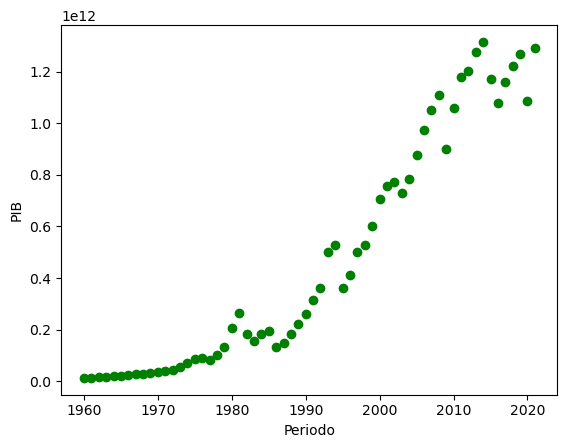

In [40]:
# Visualizremos si existe una relacion entre las variables
plt.scatter(df.Periodo, df.GDP, color='green')
plt.xlabel('Periodo')
plt.ylabel('PIB')
plt.show

In [41]:
# Aremos la variable de entrenamiento (TEST)
# Con la libreria PANDAS tomaremos la herramienta RANDOM para que tome elementos aleatorios
# y con la instruccion RAND le pedimos que tome numeros asosciadoos a la LONG de nuestro DATAFRAME
# Y que solo tome el 80% de la base completa
msk = np.random.rand(len(df)) <=0.80
msk

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True,  True, False])

In [42]:
# Ahora creamos la Variable de ENTRENAMIENTO (TRAINING) Y LA VISUALIZAMOS 
train = df[msk]
train

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10
6,1966,2.432000e+10
7,1967,2.656000e+10
8,1968,2.936000e+10
9,1969,3.248000e+10
11,1971,3.920000e+10


In [43]:
# creramos ahora la variablle e PRUEBA (TEST)
test = df[~msk]
test 

,Periodo,GDP
5,1965,2.184000e+10
10,1970,3.552000e+10
14,1974,7.200000e+10
16,1976,8.902597e+10
18,1978,1.025000e+11
42,2002,7.721064e+11
51,2011,1.180490e+12
54,2014,1.315351e+12
55,2015,1.171868e+12
56,2016,1.078491e+12


In [44]:
# Ahora aremos el Modelo de regrecion lineal simple para que nos traze una linea recta buscando el punto medio relacional de las variables
# Importaremos la libreria Skilearn para nos de el modelo lineal que queremos utilizar
# Asignamos las variables X de entrenamiento con un ARREGLO FORZOSAMENTE 'np.asaynarray'
# Despues hacemos lo mismo para la variable Y 
# Por ultimo realizamos el ajuste con .FIT propio de la liberia
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Periodo']])
train_y = np.asanyarray(train[['GDP']])
regr.fit (train_x, train_y)

LinearRegression()

In [45]:
# Ahora imprimiremos el COEFICIENTE de la regresion
# Y el COEFICIENTE del intercepto
print('Coeficiente de Pendiente', regr.coef_)
print('Coeficiente de Intercepto', regr.intercept_)

Coeficiente de Pendiente [[2.27845153e+10]]
Coeficiente de Intercepto [-4.48825463e+13]


# La ecuacion quedaria:
### PERIODO = -4.72 + 2.39 (GDP)

<function matplotlib.pyplot.show(close=None, block=None)>

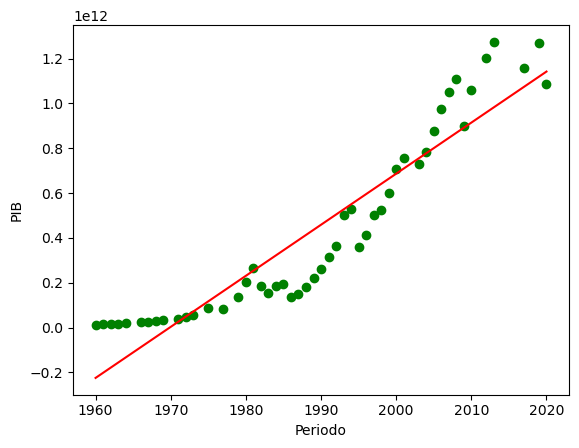

In [46]:
# Ahora aremos la grficacion con estos dos valores que obtuvimos
# vamos a utilizar los coeficientes 
# en primer estancia estamos tomando el valor de la pendiente regr.coef_[0][0] multiplicado por las X train_x mas el valor del Intercepto regr.intercept_[0]
# Indicando que quiero unir una recta ('-r')
plt.scatter(train.Periodo, train.GDP, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Periodo')
plt.ylabel('PIB')
plt.show

# Evaluacion del error

In [47]:
# Importamos la herramienta R2 de sklearn
# Y ahora vamos a definir los datos de Prueba TEST
# Hay que compararlo con nuestro modelo de regresion hast (significa a un aproximado)
# 
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Periodo']])
test_y = np.asanyarray(test[['GDP']])
test_y_hat = regr.predict(test_x)#Utilizamos la variable de regresion con el comando PREDICT vamos a predecir
#cual es la 'Y' a cada una de nuestras 'X' que tenemos en nuestro grupo de prueba

### Comparamos las 'Y'

In [48]:
test_y_hat

array([[-1.10973630e+11],
       [ 2.94894627e+09],
       [ 9.40870076e+10],
       [ 1.39656038e+11],
       [ 1.85225069e+11],
       [ 7.32053437e+11],
       [ 9.37114075e+11],
       [ 1.00546762e+12],
       [ 1.02825214e+12],
       [ 1.05103665e+12],
       [ 1.09660568e+12],
       [ 1.16495923e+12]])

In [49]:
test_y

array([[2.18400000e+10],
       [3.55200000e+10],
       [7.20000000e+10],
       [8.90259740e+10],
       [1.02500000e+11],
       [7.72106379e+11],
       [1.18048960e+12],
       [1.31535118e+12],
       [1.17186761e+12],
       [1.07849065e+12],
       [1.22240820e+12],
       [1.29303787e+12]])

In [50]:
# Vamos a calcular 3 inidcadores 
# 'Error absoluto medio'
# 'La suma de residuales' suma de los errores al cruadrado
# 'r2' para tener el desempeño maximo de uno 
# para el primer caso estamos indicando que queremos dos Decimales (%2.f) 
print('Mean absolute error: %2.f' % np.mean(np.absolute(test_y_hat - test_y)))#Calculamos la diferencia de TEST_Y_HAT contra test_y
print('Residual sum of squares (MSE): %2.f' % np.mean((test_y_hat - test_y) ** 2))# diferencia de test_y_hat y test_y elevandolas al cuadrado
print('R2-score: %2.f' % r2_score(test_y_hat, test_y))

Mean absolute error: 111590790336
Residual sum of squares (MSE): 19922354552241534271488
R2-score:  1


In [51]:
# Normalizacion
ndf = df / df.max()
ndf.describe()

,Periodo,GDP
count,62.000000,62.000000
mean,0.984908,0.369951
std,0.008927,0.345520
min,0.969817,0.009914
25%,0.977363,0.063375
50%,0.984908,0.219372
75%,0.992454,0.679973
max,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

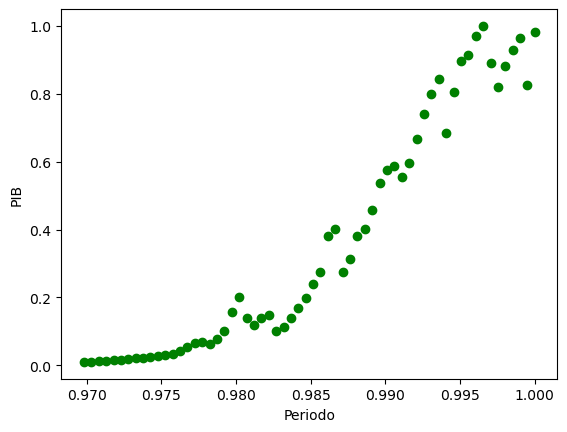

In [52]:
# Visualizremos si existe una relacion entre las variables
plt.scatter(ndf.Periodo, ndf.GDP, color='green')
plt.xlabel('Periodo')
plt.ylabel('PIB')
plt.show

In [54]:
# Aremos la variable de entrenamiento (TEST)
# Con la libreria PANDAS tomaremos la herramienta RANDOM para que tome elementos aleatorios
# y con la instruccion RAND le pedimos que tome numeros asosciadoos a la LONG de nuestro DATAFRAME
# Y que solo tome el 80% de la base completa
msk = np.random.rand(len(ndf)) <=0.80
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True])

In [55]:
# Ahora creamos la Variable de ENTRENAMIENTO (TRAINING) Y LA VISUALIZAMOS 
train = ndf[msk]
train

,Periodo,GDP
0,0.969817,0.009914
1,0.970312,0.010765
2,0.970807,0.011556
3,0.971301,0.012894
4,0.971796,0.015266
5,0.972291,0.016604
6,0.972786,0.018489
7,0.973281,0.020192
8,0.973775,0.022321
9,0.974270,0.024693


In [56]:
# creramos ahora la variablle e PRUEBA (TEST)
test = ndf[~msk]
test 

,Periodo,GDP
10,0.974765,0.027004
11,0.975260,0.029802
14,0.976744,0.054738
15,0.977239,0.066902
19,0.979218,0.102301
22,0.980703,0.140350
27,0.983177,0.112168
33,0.986145,0.380686
43,0.991094,0.554480
44,0.991588,0.594701


In [57]:
# Ahora aremos el Modelo de regrecion lineal simple para que nos traze una linea recta buscando el punto medio relacional de las variables
# Importaremos la libreria Skilearn para nos de el modelo lineal que queremos utilizar
# Asignamos las variables X de entrenamiento con un ARREGLO FORZOSAMENTE 'np.asaynarray'
# Despues hacemos lo mismo para la variable Y 
# Por ultimo realizamos el ajuste con .FIT propio de la liberia
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Periodo']])
train_y = np.asanyarray(train[['GDP']])
regr.fit (train_x, train_y)

LinearRegression()

In [58]:
# Ahora imprimiremos el COEFICIENTE de la regresion
# Y el COEFICIENTE del intercepto
print('Coeficiente de Pendiente', regr.coef_)
print('Coeficiente de Intercepto', regr.intercept_)

Coeficiente de Pendiente [[35.70709984]]
Coeficiente de Intercepto [-34.79707216]


<function matplotlib.pyplot.show(close=None, block=None)>

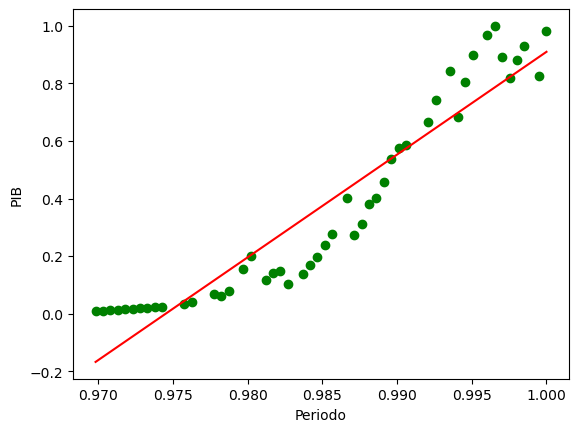

In [59]:
# Ahora aremos la grficacion con estos dos valores que obtuvimos
# vamos a utilizar los coeficientes 
# en primer estancia estamos tomando el valor de la pendiente regr.coef_[0][0] multiplicado por las X train_x mas el valor del Intercepto regr.intercept_[0]
# Indicando que quiero unir una recta ('-r')
plt.scatter(train.Periodo, train.GDP, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Periodo')
plt.ylabel('PIB')
plt.show

In [60]:
# Importamos la herramienta R2 de sklearn
# Y ahora vamos a definir los datos de Prueba TEST
# Hay que compararlo con nuestro modelo de regresion hast (significa a un aproximado)
# 
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Periodo']])
test_y = np.asanyarray(test[['GDP']])
test_y_hat = regr.predict(test_x)#Utilizamos la variable de regresion con el comando PREDICT vamos a predecir
#cual es la 'Y' a cada una de nuestras 'X' que tenemos en nuestro grupo de prueba

In [61]:
test_y_hat

array([[0.00895787],
       [0.0266259 ],
       [0.07963001],
       [0.09729804],
       [0.16797019],
       [0.22097429],
       [0.30931447],
       [0.41532268],
       [0.59200304],
       [0.60967107],
       [0.66267518],
       [0.75101536],
       [0.87469161]])

In [62]:
test_y

array([[0.0270042 ],
       [0.02980193],
       [0.05473823],
       [0.06690229],
       [0.10230074],
       [0.14034971],
       [0.11216832],
       [0.38068622],
       [0.5544803 ],
       [0.59470095],
       [0.80031576],
       [0.91313256],
       [0.96506872]])

In [63]:
# Vamos a calcular 3 inidcadores 
# 'Error absoluto medio'
# 'La suma de residuales' suma de los errores al cruadrado
# 'r2' para tener el desempeño maximo de uno 
# para el primer caso estamos indicando que queremos dos Decimales (%2.f) 
print('Mean absolute error: %2.f' % np.mean(np.absolute(test_y_hat - test_y)))#Calculamos la diferencia de TEST_Y_HAT contra test_y
print('Residual sum of squares (MSE): %2.f' % np.mean((test_y_hat - test_y) ** 2))# diferencia de test_y_hat y test_y elevandolas al cuadrado
print('R2-score: %2.f' % r2_score(test_y_hat, test_y))

Mean absolute error:  0
Residual sum of squares (MSE):  0
R2-score:  1
